## Meta Data

### DATA Description

- video_id	영상의 비디오 아이디
- channel_id	영상이 업로드 되어있는 채널 아이디
- published_date	영 상이 유튜브에 업로드된 날짜
- category_name	영상/채널의 카테고리
- duration	영상 길이 (PT1H13M25S == 1시간13분25초)
- tags	영상에 사용된 해시태그
- description	영상부연설명
- on_trending_date	인기 동영상에서 처음 포착된 날짜
- off_trending_date	인기 동영상에서 사라진 날짜
- on_rank	인기 동영상에서 처음 기록된 순위
- off_rank	인기 동영상에서 사라지기전 기록된 순위
- on_views	인기 동영상에서 처음 기록된 조회수
- off_views	인기 동영상에서 사라지기전 기록된 조회수
- on_likes	인기 동영상에서 처음 기록된 좋아요수
- off_likes	인기 동영상에서 사라지기전 기록된 좋아요수
- on_dislikes	인기 동영상에서 처음 기록된 싫어요수
- off_dislikes	인기 동영상에서 사라지기전 기록된 싫어요수
- on_comments	인기 동영상에서 처음 기록된 댓글수
- off_comments	인기 동영상에서 사라지기전 기록된 댓글수
- on_channel_subscribers	인기 동영상에서 처음 기록된 채널의 구독자수
- off_channel_subscribers	인기 동영상에서 사라지기전 기록된 채널의 구독자수
- on_channel_total_views	인기 동영상에서 처음 기록된 채널의 전체 비디오 조회수의 합
- off_channel_total_views	인기 동영상에서 사라지기전 기록된 채널의 전체 비디오
조회수의 합
- on_channel_total_videos	인기 동영상에서 처음 기록된 채널의 비디오 개수
- off_channel_total_videos	인기 동영상에서 사라지기전 기록된 채널의 비디오 개수

### TASK

## EDA & Preprocess

In [22]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; 
warnings.filterwarnings(action='ignore')


# warning 삭제용
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/pretest_data.csv')
df.head()

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
0,V-0db,CH49ta0,2021-07-01,Entertainment,PT8M20S,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...,BTS performs their hit songs ‘Dynamite’ and ‘B...,2021-07-03,2021-07-04,13,...,792,1014,10373,10720,1080000,1080000,685992413,687485021,5947,5950
1,V-1XL,CHZVD--,2021-06-24,Entertainment,PT9M17S,치킨불냉면|치킨|불냉면|냉면,영상에 나오는 캐릭터의 이름은 파도비 입니다. 고양이가 아니라 파란 도깨비입니다. ...,2021-06-26,2021-06-27,28,...,121,154,1083,1173,627000,628000,75327083,75685030,70,70
2,V-4fa,CH9w-h_,2021-07-17,Entertainment,PT7M39S,NaN,"거세 구형, 성 충동 제거를 위한 엄벌 치료 VS 인권 보호해야고민 끝에 내린 강요...",2021-07-19,2021-07-22,1,...,162,233,696,1006,5750000,5750000,5424167911,5431617741,34270,34341
3,V-5ip,CHUQVGX,2021-06-02,Sports,PT6M40S,News Network|SBS SPORTSMUG|SPORTSMUG|스포츠머그|축구|...,세계 최초 9회 연속 올림픽 본선 진출! 그동안 한국 축구의 역사를 써내려 간 올림...,2021-06-04,2021-06-04,18,...,30,30,416,416,94200,94200,71160125,71160125,224,224
4,V-5jn,CHhI3EX,2021-07-06,Sports,PT11M27S,이천수|심판도전기|축구심판,찾아 뵐 심판분들이 이제 18명정도 남았네요,2021-07-08,2021-07-09,11,...,112,143,687,772,47600,49200,6993451,7607123,21,21


### 중복 record 처리

In [4]:
### 주요변수 선택

df[['video_id','channel_id','category_name']].describe()

,video_id,channel_id,category_name
count,2644,2644,2644
unique,2643,940,15
top,VBSBm,CHQ2O-i,Entertainment
freq,2,17,954


- vid 가 중복횐 

In [5]:
df[df.duplicated(['video_id'])]

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
535,VBSBm,CHF4Wxd,2021-07-09,News & Politics,PT1M56S,MBC|MBC뉴스|뉴스데스크|newsdesk|뉴스투데이|newstoday|8시뉴스|...,전남 순천의 한 어린이집에서 원생을 마중 나온 선생님이 경사로에 밀린 학부모의 차량...,2021-07-11,2021-07-14,3,...,625,765,16067,17655,1430000,1440000,3130819202,3151554338,112154,112456


In [6]:
df[df['video_id']=='VBSBm']

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
534,VBSBm,CH0VR2v,2021-05-07,Entertainment,PT11M6S,요리|레시피|육식|고기|육식맨|고기요리|YOOXICMAN|짜장면|자장면|짜장|고기짜...,"※ 오늘 영상에 등장하는 모든 식재료, 조리도구, 업장, TV프로그램, 브랜드, 서...",2021-05-09,2021-05-10,40,...,156,187,1458,1568,652000,652000,94094934,94383615,90,90
535,VBSBm,CHF4Wxd,2021-07-09,News & Politics,PT1M56S,MBC|MBC뉴스|뉴스데스크|newsdesk|뉴스투데이|newstoday|8시뉴스|...,전남 순천의 한 어린이집에서 원생을 마중 나온 선생님이 경사로에 밀린 학부모의 차량...,2021-07-11,2021-07-14,3,...,625,765,16067,17655,1430000,1440000,3130819202,3151554338,112154,112456


video_id가 중복된 두 레코드가 내용상 서로 다르기에 이후 분석은 아래쪽 레코드의 video_id값을 변경하여 진행함


In [11]:
cond = (df['video_id']=='VBSBm') & (df['category_name']=='News & Politics')
df.loc[cond,'video_id'] = 'VBSBm_News_Politics'

In [12]:
df[['video_id','channel_id','category_name']].describe()

,video_id,channel_id,category_name
count,2644,2644,2644
unique,2644,940,15
top,V-0db,CHQ2O-i,Entertainment
freq,1,17,954


In [10]:
df[cond]

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
535,VBSBm,CHF4Wxd,2021-07-09,News & Politics,PT1M56S,MBC|MBC뉴스|뉴스데스크|newsdesk|뉴스투데이|newstoday|8시뉴스|...,전남 순천의 한 어린이집에서 원생을 마중 나온 선생님이 경사로에 밀린 학부모의 차량...,2021-07-11,2021-07-14,3,...,625,765,16067,17655,1430000,1440000,3130819202,3151554338,112154,112456


## Q1 Visualization

### Q1-1 전체 카테고리 채널-> 비디오 개수

- Q1. 데이터 타입별 시각화 (자유양식) 
  - 전체기간 카테고리->채널->비디오 개수
  - 월별 카테고리->채널->비디오 개수
  - 월별 TOP10 채널 (분류 기준은 비디오 개수)
  - 주별 TOP5 채널 (분류 기준은 비디오 개수)
 월별 카테고리별 태그 키워드 순위
- Q2. 각각의 비디오는 시청자의 호응도(engagement)를 판단할수 있는 객관적인 지표들이
있음
ex) views, likes, dislikes, comments,...
  - 비디오를 인기 동영상 기준에 부합하도록 분류할수 있는 새로운 지표를 개발하고
  - 이 지표를 사용하여 engagement 와 어떤 상관관계가 있는지 설명하시오.

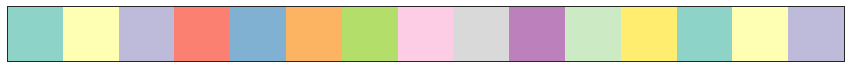

In [51]:
### 그림 설정 

# 색상 설정
categorical_col = sns.color_palette("Set3", 15)
sns.palplot(categorical_col)

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns


q1_1 = df[['video_id','category_name']].groupby(['category_name']). \
    count().\
    sort_values(by='video_id', ascending=False)
q1_1

,video_id
category_name,
Entertainment,954
People & Blogs,411
Music,234
Sports,222
Comedy,167
News & Politics,162
Howto & Style,119
Gaming,80
Film & Animation,74


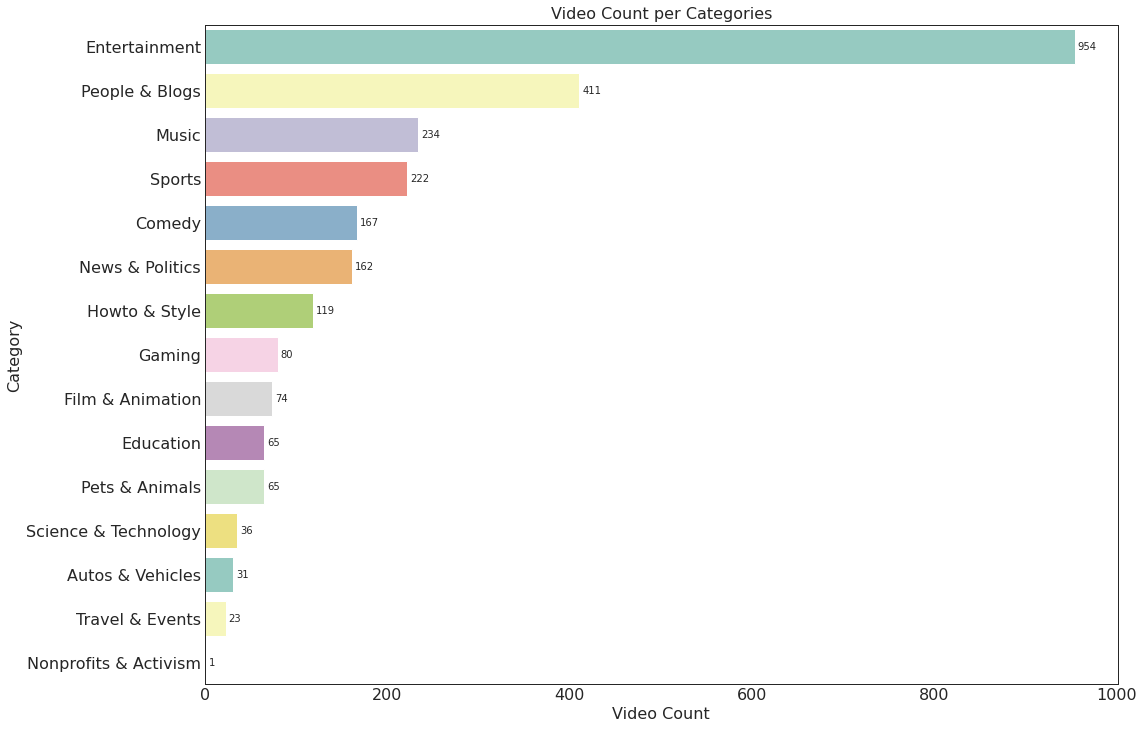

In [52]:
fig, ax = plt.subplots(figsize=(16,10))
sns.set_palette(categorical_col)
sns.barplot(x=q1_1['video_id'], y=q1_1.index, ax=ax, orient='h')
ax.bar_label(ax.containers[0], label_type='edge',padding=3)  # bar label 추가
plt.tight_layout()
# label
plt.gca().set(title='Video Count per Categories',xlabel='Video Count', ylabel='Category')
plt.show()

In [47]:
ax 

<AxesSubplot:title={'center':'Video Count per Categories'}, xlabel='Video Count', ylabel='Category'>

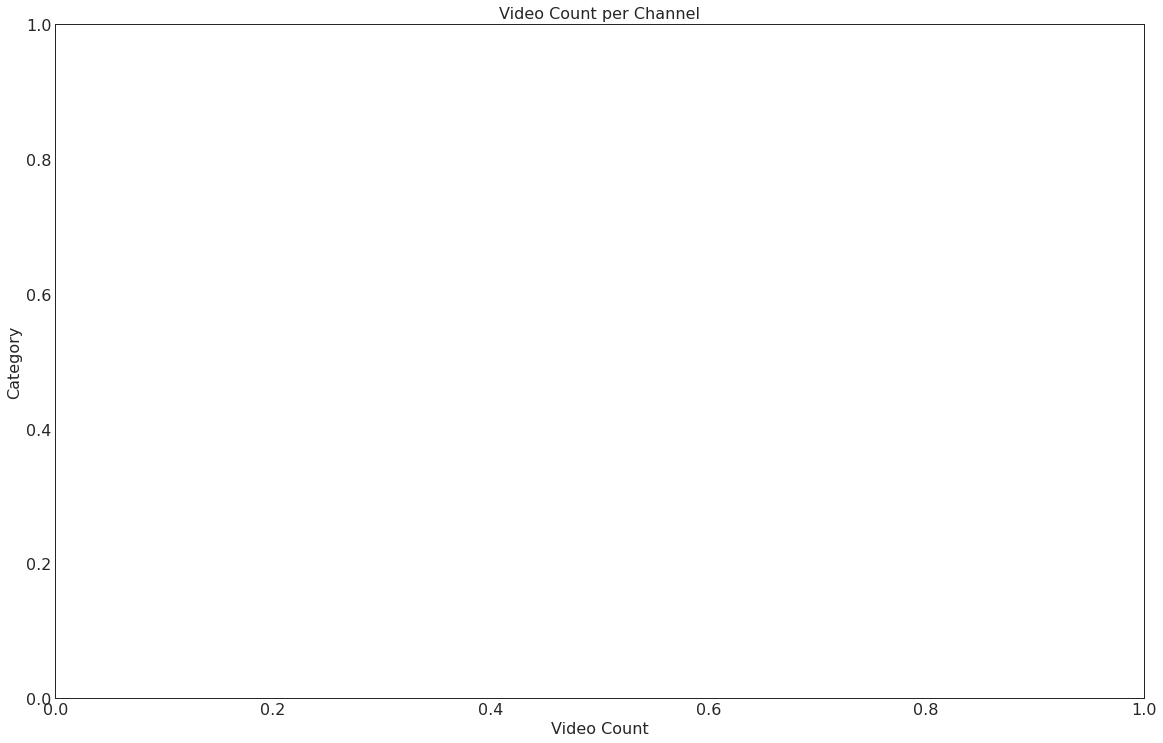

In [48]:
fig2, ax2 = plt.subplots(figsize=(16,10))
sns.set_palette(qualitative_colors)
sns.barplot(x=q1_1['video_id'], y=q1_1.index, ax=ax, orient='h')
ax.bar_label(ax.containers[0], label_type='edge')  # bar label 추가
plt.tight_layout()
# label
plt.gca().set(title='Video Count per Channel',xlabel='Video Count', ylabel='Category')
plt.show()

In [49]:
ax2

<AxesSubplot:title={'center':'Video Count per Channel'}, xlabel='Video Count', ylabel='Category'>